# Credit Card Fraud Analysis Project
##### By Manvanth Sundareshan

### Buisness Questions to address

##### 1. Can fraud prediction models support personalized risk-based pricing strategies for customers based on transaction behavior?

##### 2. Are there ways to integrate fraud prevention with marketing analytics to identify loyal customers and cross-sell premium services while maintaining security?

##### 3. Can the insights and models developed for internal fraud detection be monetized by offering fraud prevention solutions to other businesses?

### Project Outline

### 1. Importing Required Library

### 2. Basic Overview of the Data (Exploratory Data Analysis (EDA))
- **Data Summary**
- **Correlation Plot**
  - Insights from Correlation Analysis
- **Null Values in Dataset**
- **Duplicate Values in Dataset**
- **Unique Values in Dataset**

### 3. Data Visualization
- **Histogram Plot**
- **Distribution of Transaction Amounts**
- **Box Plot**
- **Correlation Plot**
  - High Positive Correlation
  - High Negative Correlation
  - Near Zero Correlation
- **Percentage Distribution**

### 4. Data Processing and Modeling
- **Splitting the model into training and testing**
- **Appying Logistic Regression**
### 5. Model Evaluation
- **Confusion Matrix**
- **ROC curve**
### 6. Sample Prediction
### 7. Buisness Questions
### 8. References

## 1. Importing Required library

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ace_tools_open as tools; 

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics  import roc_curve


## 2. Basic overview of the Data (Exploratory data analysis(EDA))

In [2]:
# Data reading by giving path and display values of dataset(first 6 rows)
credit_card_2023_data = pd.read_csv("D:/Hochschule Fresenius notes (sem3)/Artifical Intelligence and Machine Learning/CreditCard_Fraud_detection/creditcard_2023.csv", delimiter=",")
credit_card_2023_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1.0,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2.0,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3.0,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4.0,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


### Data Summary

In [3]:
credit_card_2023_data.info() # Information on the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568635 entries, 0 to 568634
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  float64
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

### Correlation Plot

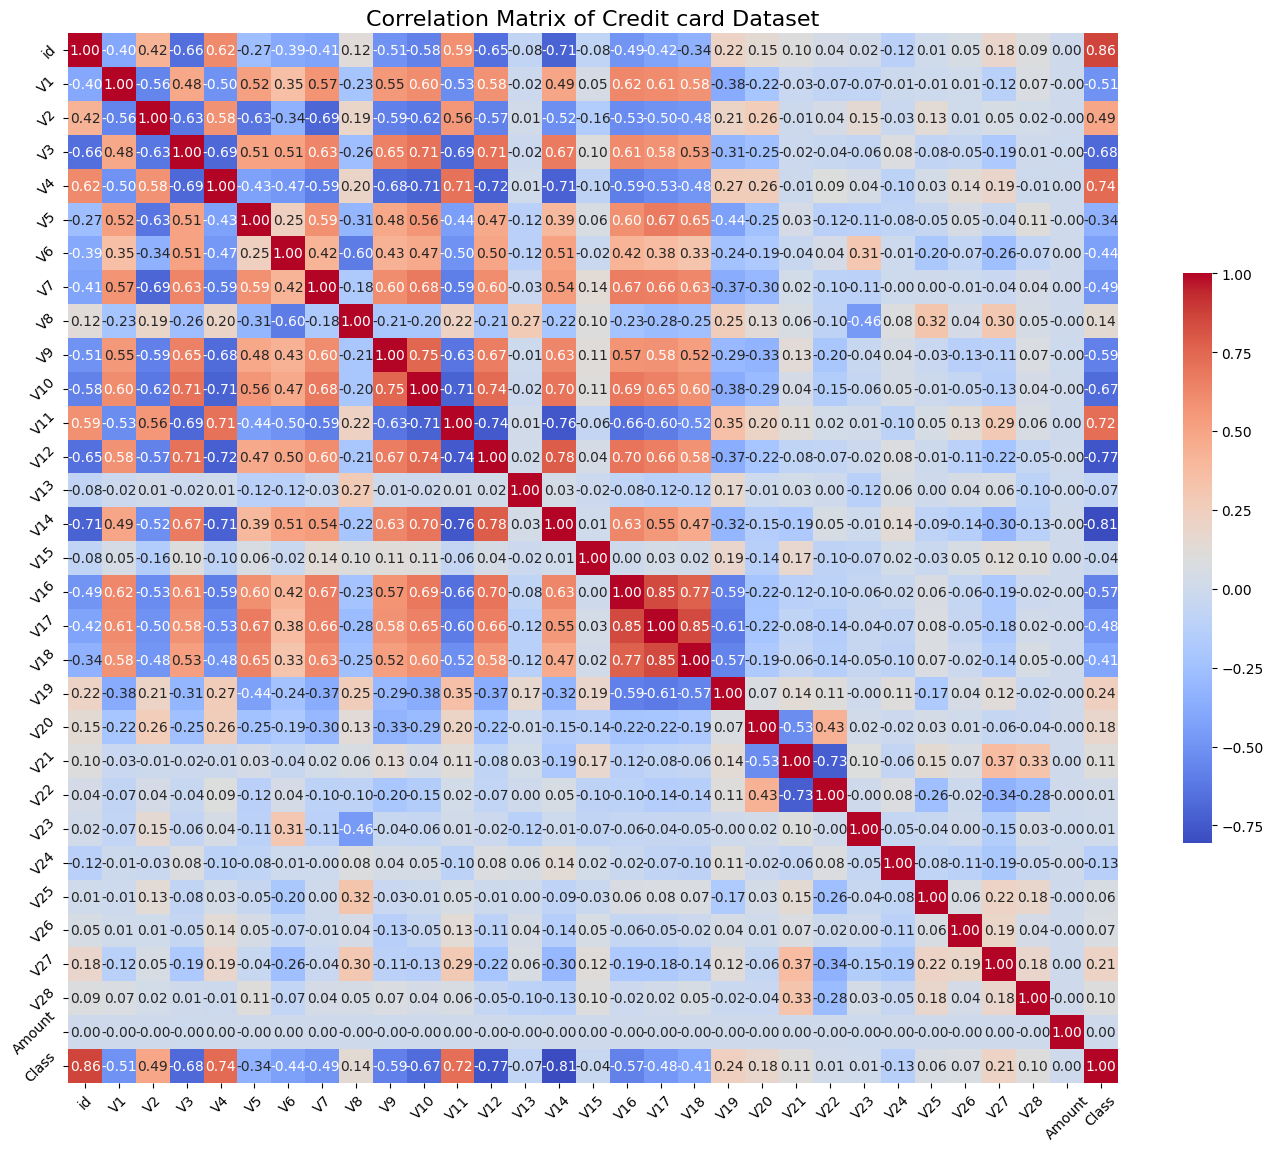

In [4]:
correlation_matrix = credit_card_2023_data.corr() # Calculate the correlation matrix of the dataset

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Credit card Dataset', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout() # Adjust the layout to prevent overlap between labels and the heatmap
plt.show()

#### Insights from Correlation Analysis:

1.Strong Positive Correlations:

Features id,V4 and V11 have the strongest positive correlation with the target variable Class.

2.Strong Negative Correlations:

Features such as V14, V12, and V3 show strong negative correlations with Class.

3.Other insights:

 Even though id is unique classifer it does not have meaningful information for underlaying data.

### Null values in dataset

In [5]:
credit_data_missing_values = credit_card_2023_data.isnull().sum() # Checking for any missing values 
print("Missing values in each column:\n", credit_data_missing_values) # Print missing values in each colomn

Missing values in each column:
 id        5
V1        5
V2        5
V3        5
V4        5
V5        5
V6        5
V7        5
V8        5
V9        5
V10       5
V11       5
V12       5
V13       5
V14       5
V15       5
V16       5
V17       5
V18       5
V19       5
V20       5
V21       5
V22       5
V23       5
V24       5
V25       5
V26       5
V27       5
V28       5
Amount    5
Class     5
dtype: int64


### Duplicate values in dataset

In [6]:
credit_data_dupli_values = credit_card_2023_data.duplicated() # Checking for any duplicate values 
print("Duplicate values in each column:\n", credit_data_dupli_values) # Print duplicate values in each colomn

credit_data_dupli_values_sum = credit_card_2023_data.duplicated().sum()
print("Duplicate values in each column:", credit_data_dupli_values_sum) # Print duplicate values overall

Duplicate values in each column:
 0         False
1         False
2         False
3         False
4         False
          ...  
568630    False
568631     True
568632     True
568633     True
568634     True
Length: 568635, dtype: bool
Duplicate values in each column: 4


### Unique values in dataset

In [7]:
unique_values_table = pd.DataFrame({
        'Column Name': credit_card_2023_data.columns, # This extracts all column names from the DataFrame
        'Data Type': [credit_card_2023_data[col].dtype for col in credit_card_2023_data.columns], # Used to describe the datatype of the colomn
        'Unique Values': [', '.join(map(str, credit_card_2023_data[col].unique()[:7])) for col in credit_card_2023_data.columns] # This extracts all uniue values to col, unto first 7 unique values.
        })

print(unique_values_table) #  Print table

   Column Name Data Type                                      Unique Values
0           id   float64                  0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0
1           V1   float64  -0.260647805, 0.985099734, -0.260271613, -0.15...
2           V2   float64  -0.46964845, -0.356045093, -0.949384607, -0.50...
3           V3   float64  2.496266083, 0.558056351, 1.728537776, 1.74684...
4           V4   float64  -0.083723913, -0.429653903, -0.457986289, -1.0...
5           V5   float64  0.129681236, 0.277140263, 0.074061654, 0.24948...
6           V6   float64  0.73289825, 0.428604515, 1.419481143, 1.143312...
7           V7   float64  0.519013618, 0.406466042, 0.743511075, 0.51826...
8           V8   float64  -0.130006048, -0.133118274, -0.095576013, -0.0...
9           V9   float64  0.727159269, 0.347451895, -0.261296619, -0.205...
10         V10   float64  0.637734541, 0.529807984, 0.6907078, 0.5752307...
11         V11   float64  -0.98702001, 0.140107331, -0.272984925, -0.752...
12         V

## 3. Data Visualization

### Histogram plot

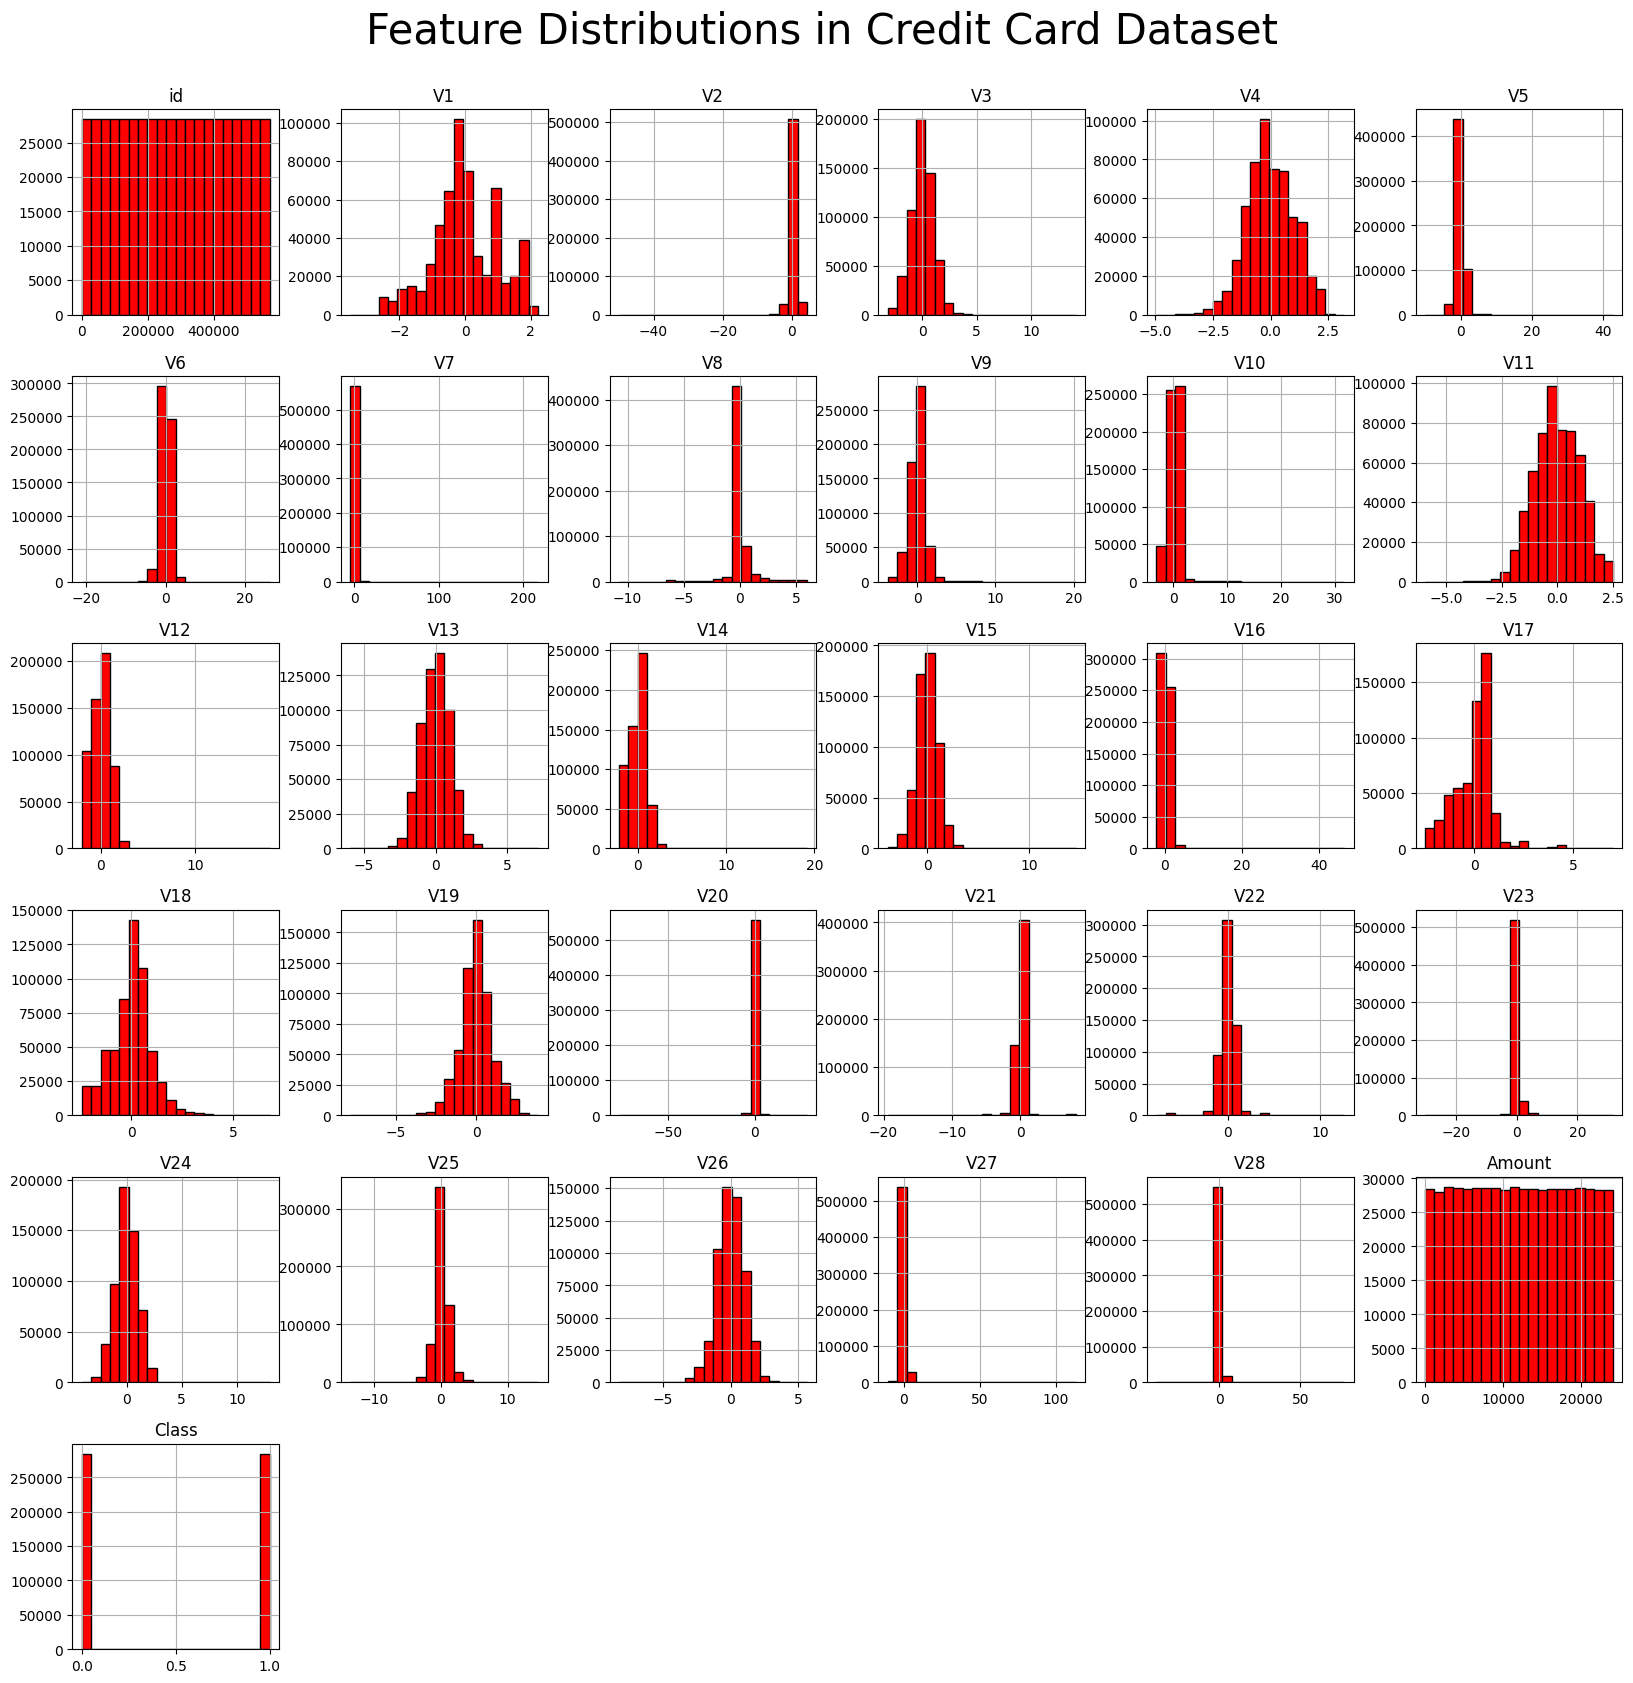

In [8]:
credit_card_2023_data.hist(bins= 20,figsize=(20,20),color= 'r',edgecolor='k'); # "dataset".hist("intervals","size of figures","color")
plt.suptitle("Feature Distributions in Credit Card Dataset", fontsize=30,y=.93)  # Overall title
plt.show()

### Distribution of Transaction Amounts

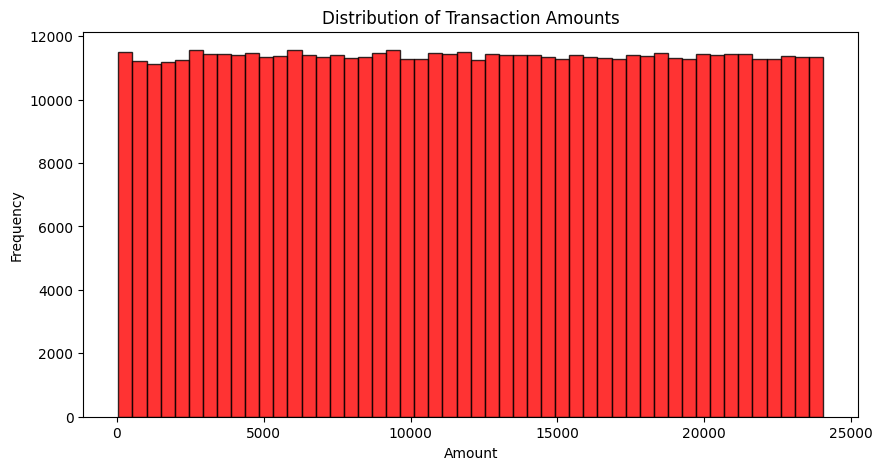

In [9]:
# Plotting Distribution of Transaction Amounts
plt.figure(figsize=(10, 5))
plt.hist(credit_card_2023_data['Amount'], bins=50, alpha=0.8,color ='r',edgecolor ='k')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

### Box plot

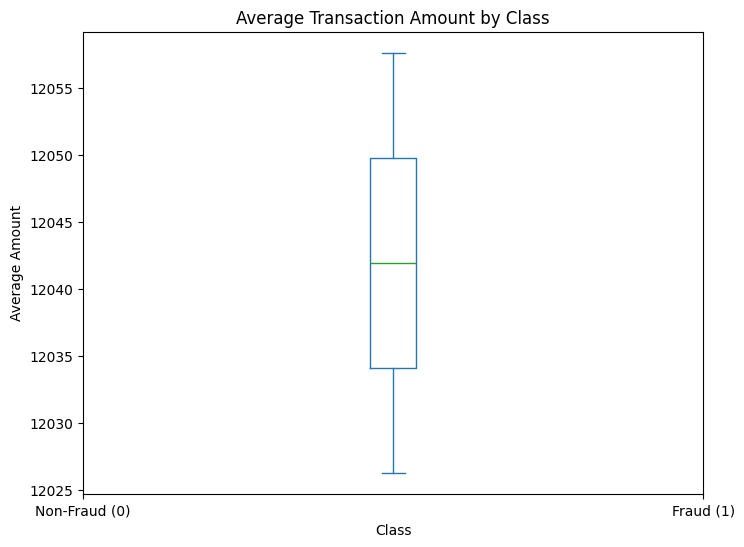

In [10]:
avg_amount_by_class = credit_card_2023_data.groupby('Class')['Amount'].mean() # Calculate the average transaction amount for each class (Non-Fraud: 0, Fraud: 1)

plt.figure(figsize=(8, 6))
avg_amount_by_class.plot(kind='box', title='Average Transaction Amount by Class')
plt.xlabel('Class')
plt.ylabel('Average Amount')
plt.xticks(ticks=[0, 2], labels=['Non-Fraud (0)', 'Fraud (1)'], rotation=0) # Customize the x-axis ticks to provide more descriptive labels for the classes
plt.show()

### Correlation plot of Features with class

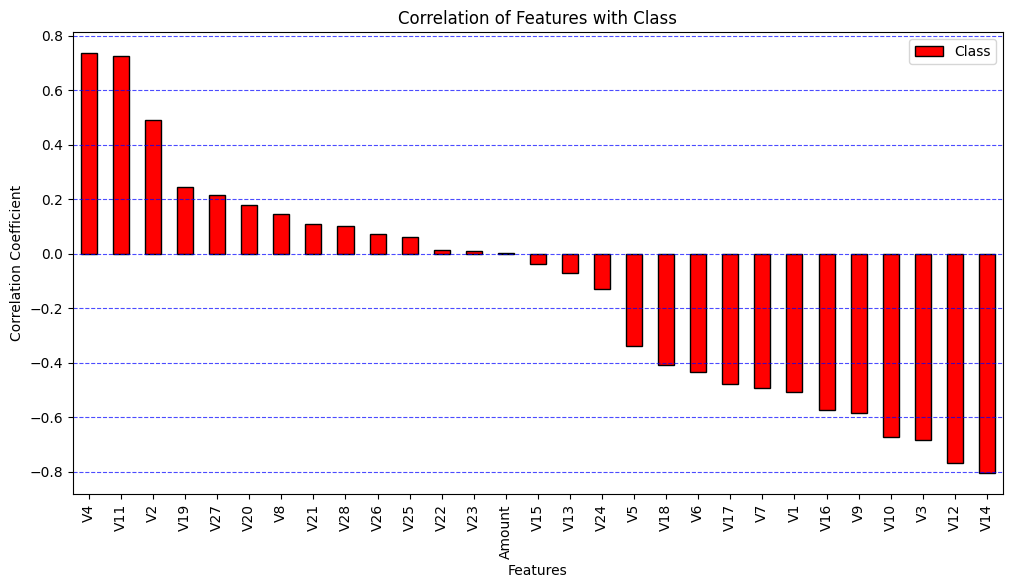

In [11]:
correlation_matrix = credit_card_2023_data.corr()

# Extract the correlation of all features with the 'Class' column
correlation_with_class = correlation_matrix["Class"].drop(labels=["Class", "id"])

# Create a bar plot for correlation with 'Class'
plt.figure(figsize=(12, 6))
correlation_with_class.sort_values(ascending=False).plot(kind='bar',color = 'r',edgecolor='k')
plt.title('Correlation of Features with Class')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.grid(axis='y', linestyle='--', alpha=0.7,color = 'b')
plt.legend(loc= 'best')
plt.show()

#### High Positive Correlation:

Features with strong positive correlation (closer to +1) are more associated with the fraudulent class. These features might serve as indicators of fraudulent behavior.

#### High Negative Correlation:

Features with strong negative correlation (closer to -1) are inversely related to fraudulent transactions. These features might represent characteristics that are common in non-fraudulent behavior.

#### Near Zero Correlation:

Features with near-zero correlation are less significant in distinguishing between fraudulent and non-fraudulent transactions.

### Percentage distribution

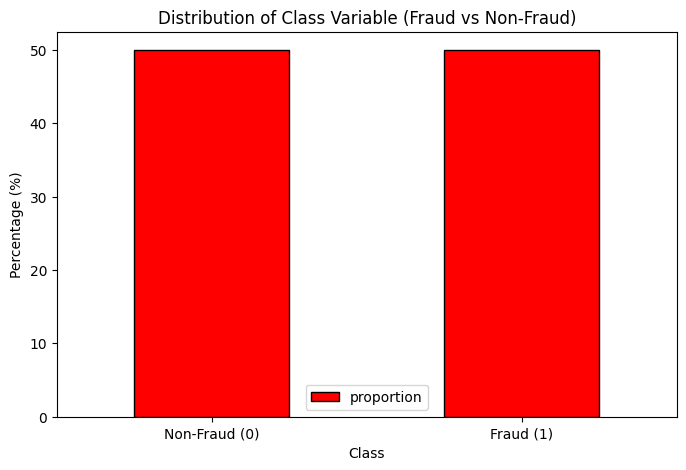

In [12]:
class_distribution = credit_card_2023_data['Class'].value_counts(normalize=True) * 100 # Get percentage distribution of classes
plt.figure(figsize=(8, 5))
class_distribution.plot(kind='bar', title='Distribution of Class Variable (Fraud vs Non-Fraud)', ylabel='Percentage (%)',color = 'r', edgecolor = 'k')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud (0)', 'Fraud (1)'], rotation=0)
plt.legend(loc='best')
plt.xlabel('Class')
plt.show()

## 4. Data Processing and Modeling

In [13]:
# Remove rows where y is NaN
credit_card_2023_data = credit_card_2023_data.dropna(subset=['Class'])

In [14]:
# Features and target variable
X = credit_card_2023_data.drop(columns=['id', 'Class'])   # Features are all columns except 'id','class'
y = credit_card_2023_data['Class']  # Target variable is 'class'

In [15]:
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [16]:
#Verify that no NaN values remain
print(X.isnull().sum().sum())

0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% testing, random state=42

In [18]:
# Initialize logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

In [19]:
# Fit the model on the training data
logistic_model.fit(X_train, y_train)

C:\Users\a\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [20]:
# Make predictions on the testing data
y_pred = logistic_model.predict(X_test)

## 5. Model Evaluation

In [21]:
# Evaluate the model-Confusion and Roc value generation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))
print("\nROC-Score:")
print(roc_auc_score(y_test, y_pred))

Confusion Matrix:
[[83296  1853]
 [ 4112 81328]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97     85149
         1.0       0.98      0.95      0.96     85440

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589


Accuracy Score:
0.9650329153696897

ROC-Score:
0.9650554032118979


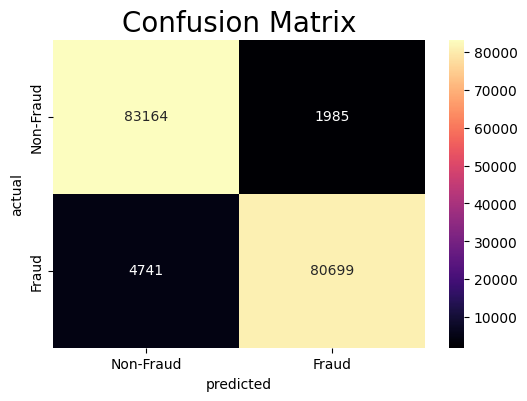

In [22]:
confusion_matrix = np.array([[83164, 1985],[4741, 80699]])

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix, annot=True, fmt='d',cmap="magma",xticklabels=['Non-Fraud','Fraud'],yticklabels=['Non-Fraud','Fraud'])
plt.title('Confusion Matrix',fontsize=20)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()


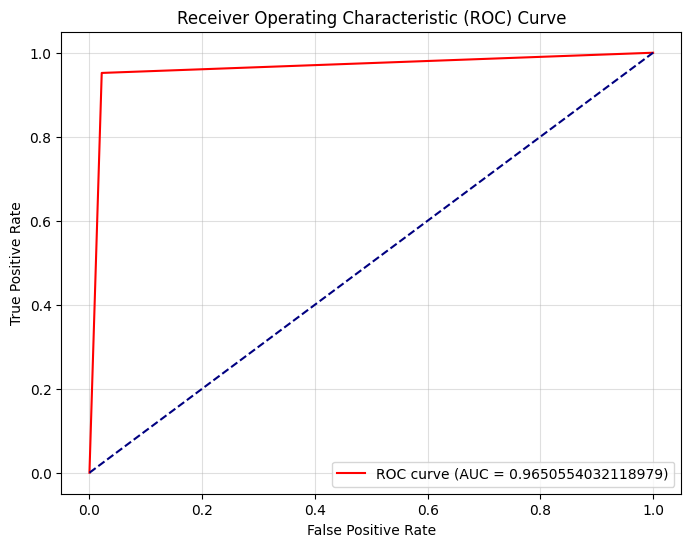

In [23]:
# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr,color='r',label=f'ROC curve (AUC = {roc_auc_score(y_test, y_pred)})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.4)
plt.legend(loc='best')
plt.show()

## 6. Sample Prediction 

In [24]:
credit_card_2023_data.head(34491)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1.0,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2.0,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3.0,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4.0,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34486,34486.0,-0.128112,-0.351426,2.209091,-0.490756,-0.030240,0.308687,0.636128,-0.103853,0.614993,...,-0.007999,0.235315,0.102848,0.612630,-0.199729,-1.240844,-0.156574,0.218629,808.60,0.0
34487,34487.0,0.073357,-0.414937,0.425743,-2.227429,0.051433,-0.188342,0.359251,-0.094690,-0.774566,...,-0.087702,0.389517,-0.010100,0.002422,-1.196170,-1.016150,0.167941,0.364524,6630.28,0.0
34488,34488.0,1.012939,-0.694308,0.282839,-1.118636,0.873545,2.396567,0.088889,0.098001,1.245301,...,-0.214929,-0.682876,0.002447,2.411952,0.390323,1.906058,-0.278034,-0.072858,10462.19,0.0
34489,34489.0,-0.213017,-0.434416,1.389727,-1.179364,0.013267,0.078915,1.240487,-0.212381,0.163364,...,-0.007760,0.085800,0.286447,0.951962,0.780348,1.995946,-0.422860,0.054152,9502.95,0.0


In [25]:
print(f"Total rows in the dataset: {len(credit_card_2023_data)}") # Check number of rows in dataset 

Total rows in the dataset: 568630


Prediction 1

In [26]:
feat1 = pd.DataFrame({"V1":-0.26065,"V2":-0.46965,"V3":2.496266,"V4":-0.08372,"V5": 0.129681,"V6":0.732898,"V7":0.519014,"V8":-0.13001,"V9":0.727159,"V10":0.637735,"V11":-0.98702,"V12":0.293438,"V13":-0.94139,"V14":0.54902,"V15":1.804879,"V16":0.215598,"V17":0.512307,"V18":0.333644,"V19":0.12427,"V20":0.091202,"V21":-0.11055,"V22":0.217606,"V23":-0.13479,"V24":0.165959,"V25":0.12628,"V26":-0.43482,"V27":-0.08123,"V28":-0.15105,"Amount":17982.1}, index=[0])

In [27]:
new_prediction_1 = logistic_model.predict(feat1)
if new_prediction_1 == 0:
    print("The value is 0, indicating transaction is Non-Fradulent")
elif new_prediction_1 == 1:
    print("The value is 1, indicating transaction is a Fraudulent")
else:
    print("Error")

The value is 0, indicating transaction is Non-Fradulent


Prediction 2

In [28]:
feat30000 = pd.DataFrame({"V1":-0.720433912,"V2":0.185423364,"V3":-0.479901107,"V4":0.254931602,"V5":-0.309119785,"V6":-0.105851336,"V7":-0.313341684,"V8":-0.038167676,"V9":-0.349124009,"V10":-0.285048091,"V11":0.567508816,"V12":-0.702076928,"V13":0.762436313,"V14":-0.679164981,"V15":-0.699000581,"V16":-0.964456784,"V17":-1.133688384,"V18":-0.986158949,"V19":0.483322364,"V20":-0.539177693,"V21":0.382976105,"V22":1.079694181,"V23":-0.213188037,"V24":0.389782826,"V25":-0.711143404,"V26":-0.266064758,"V27":-0.957207324,"V28":0.954979626,"Amount":8381.25},index=[0])


In [29]:
new_prediction_2 = logistic_model.predict(feat30000)

if new_prediction_2 == 0:
    print("The value is 0, indicating transaction is Non-Fradulent")
elif new_prediction_2 == 1:
    print("The value is 1, indicating transaction is a Fraudulent")
else:
    print("Error")

The value is 1, indicating transaction is a Fraudulent


prediction 3

In [30]:
feat34490 = pd.DataFrame({
    "V1": 1.012938603,
    "V2": -0.694308403,
    "V3": 0.282839412,
    "V4": -1.118636061,
    "V5": 0.873544724,
    "V6": 2.396567271,
    "V7": 0.08888945,
    "V8": 0.098000584,
    "V9": 1.245301199,
    "V10": 0.440875593,
    "V11": -1.00067237,
    "V12": 0.906504982,
    "V13": -0.00737723,
    "V14": 0.507068993,
    "V15": -0.165431407,
    "V16": 0.601559393,
    "V17": 0.332415845,
    "V18": 0.198880231,
    "V19": 0.467264351,
    "V20": -0.072268839,
    "V21": -0.214928966,
    "V22": -0.682875708,
    "V23": 0.002447416,
    "V24": 2.411952328,
    "V25": 0.390322752,
    "V26": 1.906058264,
    "V27": -0.278034322,
    "V28": -0.072857595,
    "Amount": 10462.19
}, index=[0])

In [31]:
new_prediction_3 = logistic_model.predict(feat34490)

if new_prediction_3 == 0:
    print("The value is 0, indicating transaction is Non-Fradulent")
elif new_prediction_3 == 1:
    print("The value is 1, indicating transaction is a Fraudulent")
else:
    print("Error")

The value is 0, indicating transaction is Non-Fradulent


prediction 4

In [32]:
feat400799 = pd.DataFrame({
    "V1": 0.927361897,
    "V2": -0.04569645,
    "V3": 0.027553349,
    "V4": 0.158852601,
    "V5": 0.600572356,
    "V6": -0.212218064,
    "V7": 0.574097493,
    "V8": -0.174781224,
    "V9": 0.482093949,
    "V10": -0.078330653,
    "V11": 0.021085534,
    "V12": 0.634967859,
    "V13": 0.26334742,
    "V14": -0.623314299,
    "V15": 0.318314298,
    "V16": 1.024867097,
    "V17": 2.68675509,
    "V18": 1.142452678,
    "V19": -1.327837315,
    "V20": -0.192286999,
    "V21": -0.246257724,
    "V22": -0.639324086,
    "V23": -0.130046134,
    "V24": -0.003982196,
    "V25": 1.011876721,
    "V26": -0.788689351,
    "V27": -0.11508503,
    "V28": 0.207946198,
    "Amount": 11508.57
}, index=[0])

In [33]:
new_prediction_4 = logistic_model.predict(feat400799)

if new_prediction_4 == 0:
    print("The value is 0, indicating transaction is Non-Fradulent")
elif new_prediction_4 == 1:
    print("The value is 1, indicating transaction is a Fraudulent")
else:
    print("Error")

The value is 1, indicating transaction is a Fraudulent


Model file creation

In [34]:
import joblib
joblib.dump(logistic_model,"credit_card_Fraud_detection_model") # Create PKL file model model deployment

['credit_card_Fraud_detection_model']

## 7.Business Questions

##### 1. Can fraud prediction models support personalized risk-based pricing strategies for customers based on transaction behavior?
- Machine learning models are effective at classifying and scoring transactions based on features extracted from historical data, including spending patterns and anomalies (Lakshmi and Kavila, 2018).
- These probabilities (or risk scores) can be leveraged in pricing strategies.
- Customers demonstrating high-risk users identified by the model could face adjusted rates reflecting the increased potential for fraud. 
- By using logistic Regression, we are interpreting the risk probabilities, making it a practical tool for integrating fraud detection into personalized financial offerings.

##### 2. Are there ways to integrate fraud prevention with marketing analytics to identify loyal customers and cross-sell premium services while maintaining security?
- By analyzing transaction frequency and consistency fraud detection models can flag customers with stable and trustworthy behavior as loyal.
- A customer flagged as low risk with frequent high-value travel bookings could be targeted with offers for travel benefits or premium concierge services.
- Robust fraud prevention as a value-added service.

##### 3. Can the insights and models developed for internal fraud detection be monetized by offering fraud prevention solutions to other businesses?
- Fraud detection systems can be repackaged into APIs or software solutions for other companies to integrate.
- Companies can sell or license their fraud prevention technologies to businesses in industries 

## 8.References

•	Lakshmi, S. V. S. S., & Kavila, S. D. (2018). Machine Learning for Credit Card Fraud Detection System. International Journal of Applied Engineering Research, 13(24), pp. 16819–16824.